In [1]:
import numpy as np
import pandas as pd
from pandas import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

sales = pd.read_csv('train.csv', parse_dates = [0], date_parser = parser)

In [3]:
sales = sales.set_index('date')
sales['month'] = sales.index.month
sales['year'] = sales.index.year
print(len(sales))
sales.head()

913000


,store,item,sales,month,year
date,,,,,
2013-01-01,1,1,13,1,2013
2013-01-02,1,1,11,1,2013
2013-01-03,1,1,14,1,2013
2013-01-04,1,1,13,1,2013
2013-01-05,1,1,10,1,2013


In [4]:
# Restructure Full Data Set

store_list = []
items_by_store = []
daily_sales_list = []
daily_diff_list = []
monthly_sales_list = []
monthly_diff_list = []

# Separate sales by store for the training set

for i in range(1, 11):
    store = sales[sales.store == i]
    store_list.append(store)
    
# Create a separate dataframe to store non-sales columns for each store in our list
    
for i in store_list:
    sales_items = i.drop(columns='sales')
    items_by_store.append(sales_items)

# Convert our time series to daily stationary for each store

for i in store_list:
    daily_sales = i.reset_index().resample('D', on='date').sum()
    daily_diff = daily_sales.sales.diff(periods = 1)
    daily_diff = pd.DataFrame(daily_diff)
    daily_diff = daily_diff[1:]
    daily_sales = pd.DataFrame(daily_sales.sales)
    daily_sales_list.append(daily_sales)
    daily_diff_list.append(daily_diff)
    
# Convert our time series to monthly stationary for each store

for i in store_list:
    monthly_sales = i.reset_index().resample('M', on='date').sum()
    monthly_diff = monthly_sales.sales.diff(periods = 1)
    monthly_diff = pd.DataFrame(monthly_diff)
    monthly_diff = monthly_diff[1:]
    monthly_sales = pd.DataFrame(monthly_sales.sales)
    monthly_sales_list.append(monthly_sales)
    monthly_diff_list.append(monthly_diff)
    

In [5]:
store1_daily_sales = daily_sales_list[0]
print(len(store1_daily_sales))
store1_daily_sales.head()

1826


,sales
date,
2013-01-01,1316
2013-01-02,1264
2013-01-03,1305
2013-01-04,1452
2013-01-05,1499


In [6]:
store1_monthly_sales = monthly_sales_list[0]
print(len(store1_monthly_sales))
store1_monthly_sales.head()

60


,sales
date,
2013-01-31,41077
2013-02-28,41306
2013-03-31,55827
2013-04-30,61523
2013-05-31,69272


In [7]:
sales_train = sales[sales.year < 2017]
print(len(sales_train))
sales_train.head()

730500


,store,item,sales,month,year
date,,,,,
2013-01-01,1,1,13,1,2013
2013-01-02,1,1,11,1,2013
2013-01-03,1,1,14,1,2013
2013-01-04,1,1,13,1,2013
2013-01-05,1,1,10,1,2013


In [8]:
sales_test = sales[sales.year == 2017]
print(len(sales_test))
sales_test.head()

182500


,store,item,sales,month,year
date,,,,,
2017-01-01,1,1,19,1,2017
2017-01-02,1,1,15,1,2017
2017-01-03,1,1,10,1,2017
2017-01-04,1,1,16,1,2017
2017-01-05,1,1,14,1,2017


In [9]:
# Restructure Train Data

store_train_list = []
items_by_store_train = []
daily_sales_train_list = []
daily_diff_train_list = []
monthly_sales_train_list = []
monthly_diff_train_list = []

# Separate sales by store for the training set

for i in range(1, 11):
    store = sales_train[sales_train.store == i]
    store_train_list.append(store)
    
# Create a separate dataframe to store non-sales columns for each store in our list
    
for i in store_train_list:
    sales_items = i.drop(columns='sales')
    items_by_store_train.append(sales_items)

# Convert our time series to daily stationary for each store

for i in store_train_list:
    daily_sales = i.reset_index().resample('D', on='date').sum()
    daily_diff = daily_sales.sales.diff(periods = 1)
    daily_diff = pd.DataFrame(daily_diff)
    daily_diff = daily_diff[1:]
    daily_sales = pd.DataFrame(daily_sales.sales)
    daily_sales_train_list.append(daily_sales)
    daily_diff_train_list.append(daily_diff)
    
# Convert our time series to monthly stationary for each store

for i in store_train_list:
    monthly_sales = i.reset_index().resample('M', on='date').sum()
    monthly_diff = monthly_sales.sales.diff(periods = 1)
    monthly_diff = pd.DataFrame(monthly_diff)
    monthly_diff = monthly_diff[1:]
    monthly_sales = pd.DataFrame(monthly_sales.sales)
    monthly_sales_train_list.append(monthly_sales)
    monthly_diff_train_list.append(monthly_diff)
    

In [10]:
store1_daily_sales_train = daily_sales_train_list[0]
print(len(store1_daily_sales_train))
store1_daily_sales_train.head()

1461


,sales
date,
2013-01-01,1316
2013-01-02,1264
2013-01-03,1305
2013-01-04,1452
2013-01-05,1499


In [11]:
store1_monthly_sales_train = monthly_sales_train_list[0]
print(len(store1_monthly_sales_train))
store1_monthly_sales_train.head()

48


,sales
date,
2013-01-31,41077
2013-02-28,41306
2013-03-31,55827
2013-04-30,61523
2013-05-31,69272


In [12]:
# Restructure Test Data

store_test_list = []
items_by_store_test = []
daily_sales_test_list = []
daily_diff_test_list = []
monthly_sales_test_list = []
monthly_diff_test_list = []

# Separate sales by store for the training set

for i in range(1, 11):
    store = sales_test[sales_test.store == i]
    store_test_list.append(store)
    
# Create a separate dataframe to store non-sales columns for each store in our list
    
for i in store_test_list:
    sales_items = i.drop(columns='sales')
    items_by_store_test.append(sales_items)

# Convert our time series to daily stationary for each store

for i in store_test_list:
    daily_sales = i.reset_index().resample('D', on='date').sum()
    daily_diff = daily_sales.sales.diff(periods = 1)
    daily_diff = pd.DataFrame(daily_diff)
    daily_diff = daily_diff[1:]
    daily_sales = pd.DataFrame(daily_sales.sales)
    daily_sales_test_list.append(daily_sales)
    daily_diff_test_list.append(daily_diff)
    
# Convert our time series to monthly stationary for each store

for i in store_test_list:
    monthly_sales = i.reset_index().resample('M', on='date').sum()
    monthly_diff = monthly_sales.sales.diff(periods = 1)
    monthly_diff = pd.DataFrame(monthly_diff)
    monthly_diff = monthly_diff[1:]
    monthly_sales = pd.DataFrame(monthly_sales.sales)
    monthly_sales_test_list.append(monthly_sales)
    monthly_diff_test_list.append(monthly_diff)
    

In [13]:
store1_daily_sales_test = daily_sales_test_list[0]
print(len(store1_daily_sales_test))
store1_daily_sales_test.head()

365


,sales
date,
2017-01-01,2155
2017-01-02,1441
2017-01-03,1635
2017-01-04,1713
2017-01-05,1858


In [14]:
store1_monthly_sales_test = monthly_sales_test_list[0]
print(len(store1_monthly_sales_test))
store1_monthly_sales_test.head()

12


,sales
date,
2017-01-31,56086
2017-02-28,56098
2017-03-31,74037
2017-04-30,85338
2017-05-31,92248


In [15]:
import copy 
from random import random
from math import sqrt
import itertools
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore")

In [18]:
# evaluate a SARIMA model for a given order (p,d,q) and seasonal order (P, D, Q, m)

def evaluate_sarima_model(X, arima_order, seasonal_arima_order):
    
    # prepare historical dataset
        
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # make predictions
    
    predictions = list()
    for t in range(len(test)):
        sarima = SARIMAX(history, order=arima_order, seasonal_order=seasonal_arima_order)
        sarima = sarima.fit(disp=0)
        yhat = sarima.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        
#     # calculate out of sample error
    
    error = sqrt(mean_squared_error(test, predictions))
    return error

In [19]:
p = range(0, 9)
d = range(0, 2)
q = range(0, 2)
P = range(0, 2)
D = range(0, 2)
Q = range(0, 2)

def evaluate_sarima_models(data, p_values, d_values, q_values, P_values, D_values, Q_values, m=[12]):

    global best_pdq
    global best_PDQm
    global best_score


    data = data.astype('float32')
    best_score, best_pdq, best_PDQm = float("inf"), None, None
    config = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, m))

    for i in config:
        pdq = i[0:3]
        PDQm = i[3:]
        try:
            rmse = evaluate_sarima_model(data, pdq, PDQm)
            if rmse < best_score:
                best_score, best_pdq, best_PDQm = rmse, pdq, PDQm
        except:
            continue
                                    
    print('Best SARIMA%s,%s RMSE=%.3f' % (best_pdq, best_PDQm, best_score))

In [22]:
sarima_monthly_sales_predictions_list = []
sarima_rmse_list = []
sarima_monthly_data = []


def sarima_pipeline(monthly_sales_by_store, monthly_sales_train, monthly_sales_test):
    
    for i in range(len(monthly_sales_by_store)):
        
        print('Store {}:'.format(i+1))
        
        data = monthly_sales_by_store[i]
        train = monthly_sales_train[i]
        test = monthly_sales_test[i]
        
        p_range = range(0, 3)
        d_range = range(0, 2)
        q_range = range(0, 2)
        P_range = range(0, 3)
        D_range = range(0, 2)
        Q_range = range(0, 2)

        
        evaluate_sarima_models(data.values, p_range, d_range, q_range, P_range, D_range, Q_range)
        
        
        # Fit SARIMA Model

        if best_pdq[1] == 0:
            sarima = SARIMAX(train, order=best_pdq, seasonal_order=best_PDQm, enforce_stationarity=False)
            sarima = sarima.fit(disp=0)
        else:
            sarima = SARIMAX(train, order=best_pdq, seasonal_order=best_PDQm)
            sarima = sarima.fit(disp=0)

        # plot predictions

        predictions = sarima.forecast(12)
        sarima_monthly_sales_predictions_list.append(predictions)

        error = sqrt(mean_squared_error(test, predictions))
        sarima_rmse_list.append(error)


        data['forecast'] = sarima.forecast(12)  
        data[['sales', 'forecast']].plot()
        sarima_monthly_data.append(data)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.title("Store {} Total Monthly Sales".format(i+1))
        plt.ylim(0, 160000)
        plt.xlim(datetime.strptime('01/01/2013', "%m/%d/%Y"), datetime.strptime('01/01/2018', "%m/%d/%Y"));
             

Store 1:
Best SARIMA(1, 1, 1),(0, 1, 0, 12) RMSE=1456.490
Store 2:
Best SARIMA(2, 1, 0),(0, 1, 0, 12) RMSE=2161.715
Store 3:
Best SARIMA(2, 1, 0),(0, 1, 0, 12) RMSE=1665.677
Store 4:
Best SARIMA(2, 1, 0),(0, 1, 0, 12) RMSE=1713.943
Store 5:
Best SARIMA(1, 0, 1),(1, 1, 0, 12) RMSE=1250.719
Store 6:
Best SARIMA(2, 0, 1),(0, 1, 0, 12) RMSE=957.393
Store 7:
Best SARIMA(2, 1, 0),(0, 1, 0, 12) RMSE=1164.475
Store 8:
Best SARIMA(0, 1, 1),(0, 1, 0, 12) RMSE=2280.965
Store 9:
Best SARIMA(2, 1, 0),(0, 1, 0, 12) RMSE=1500.891
Store 10:
Best SARIMA(1, 0, 1),(1, 1, 0, 12) RMSE=1892.016


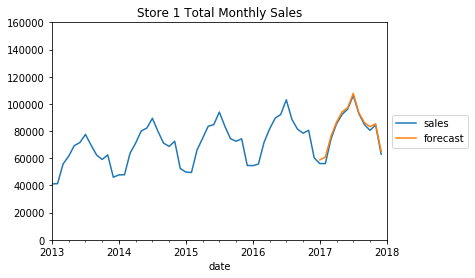

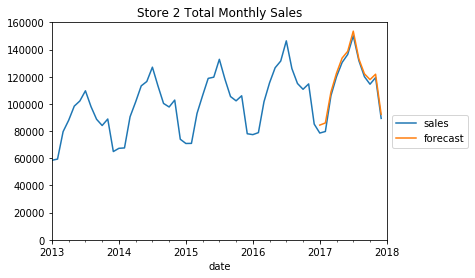

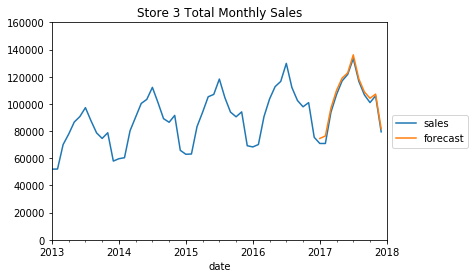

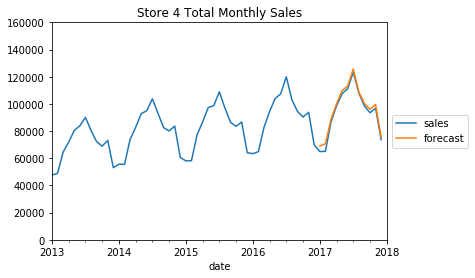

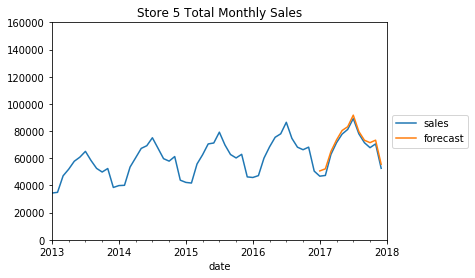

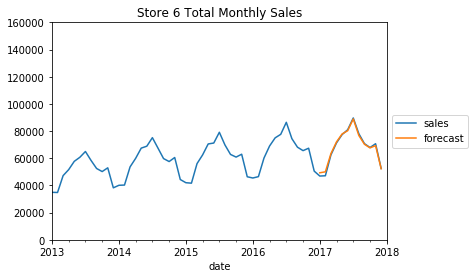

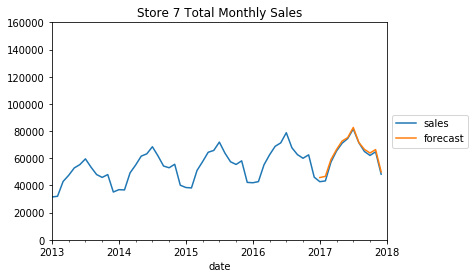

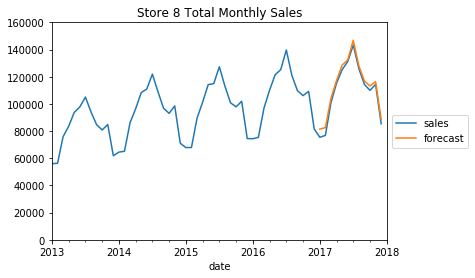

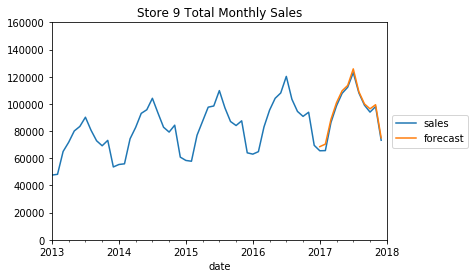

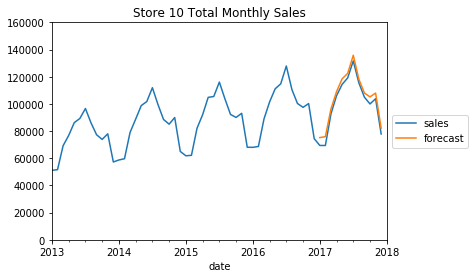

In [23]:
sarima_pipeline(monthly_sales_list, monthly_sales_train_list, monthly_sales_test_list)